In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance-cost.csv")

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
df.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

In [69]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
df.describe()

,age,bmi,children,charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.251124,30.656196,1.092954,13249.047386
std,14.043039,6.104154,1.201547,12088.979644
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.237500,0.000000,4746.521225
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])
df["sex"].unique()

array([0, 1])

In [73]:
le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])
df["smoker"].unique()

array([1, 0])

In [74]:
le_region = LabelEncoder()
df["region"] = le_region.fit_transform(df["region"])
df["region"].unique()

array([3, 2, 1, 0])

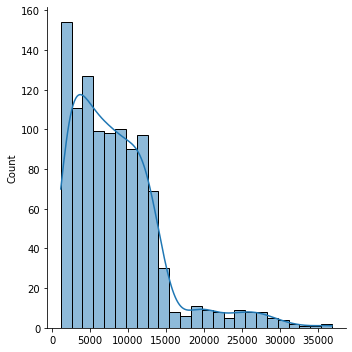

In [76]:
sns.displot(df.loc[df.smoker == 0]['charges'].values.tolist(), kde=True)

In [46]:
X = df.iloc[:, :-1]
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [47]:
y = df.iloc[:, -1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [48]:
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()
# linear_reg.fit(X, y)
# y_pred = linear_reg.predict(X)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# error = np.sqrt(mean_squared_error(y, y_pred))
# error

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred = regressor.predict(X)

In [52]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

442.610766076362

In [53]:
# from sklearn.ensemble import RandomForestRegressor
# random_for_reg = RandomForestRegressor(random_state=0)
# random_for_reg.fit(X,y)

In [54]:
# y_pred = random_for_reg.predict(X)

In [55]:
# error = np.sqrt(mean_squared_error(y, y_pred))
# error

In [56]:
# from sklearn.model_selection import GridSearchCV

# max_depth = [None, 2, 4, 6, 8, 10, 12]
# parameters = {"max_depth": max_depth}

# regressor = DecisionTreeRegressor(random_state=0)
# gs = GridSearchCV(regressor, parameters, scoring = "neg_mean_squared_error")
# gs.fit(X, y)

In [57]:
# regressor = gs.best_estimator_
# regressor.fit(X,y)
# y_pred = regressor.predict(X)
# error = error = np.sqrt(mean_squared_error(y, y_pred))
# error

In [58]:
X.loc[:20]

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
5,31,0,25.740,0,0,2
6,46,0,33.440,1,0,2
7,37,0,27.740,3,0,1
8,37,1,29.830,2,0,0
9,60,0,25.840,0,0,1


In [59]:
array = np.array([[20, "male", 29.820, 0, "yes", "southeast"]])
array[:, 1] = le_sex.transform(array[:, 1])
array[:, 4] = le_smoker.transform(array[:, 4])
array[:, -1] = le_region.transform(array[:, -1])
index_values = [0]
column_values = ["age", "sex", "bmi", "children", "smoker", "region"]
X = pd.DataFrame(data = array, 
                 index = index_values,
                columns = column_values)
X

,age,sex,bmi,children,smoker,region
0,20,1,29.82,0,1,2


In [60]:
y_pred = regressor.predict(X)
y_pred[0]

19933.458

In [61]:
import pickle

In [62]:
data = {"model": regressor, "le_sex": le_sex, "le_smoker": le_smoker, "le_region": le_region}
with open("saved_steps.pkl", "wb") as file:
    pickle.dump(data,file)

In [63]:
with open("saved_steps.pkl", "rb") as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_sex = data["le_sex"]
le_smoker = data["le_smoker"]
le_region = data["le_region"]

In [64]:
y_pred = regressor_loaded.predict(X)
y_pred

array([19933.458])